In [7]:
# 33subjs * 320 volumes * 13 rois

ts_n.shape

(33, 320, 13)

<font color=orange size=5 face="黑体"> Static Functional Connectivity </font>

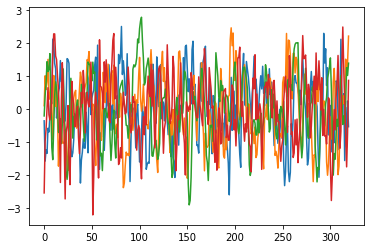

In [8]:
from matplotlib import pyplot as plt 

%matplotlib inline

subject = 12
plt.plot(ts_n[subject,:,3:7]) ## rois 4 to 7

In [9]:
from nilearn.connectome import ConnectivityMeasure
estimator = ConnectivityMeasure(kind='correlation',vectorize=False,discard_diagonal=True)

static_FC = estimator.fit_transform(ts_n)

In [10]:
print(static_FC.shape)

(33, 13, 13)


<font color=orange size=5 face="黑体"> Dynamic Functional Connectivity </font>

In [11]:
%reload_ext autoreload
%autoreload 2

In [12]:
from dynamicFC import sl_run

# Q: which window type?
# A: Savva, A. D., Kassinopoulos, M., Smyrnis, N., Matsopoulos, G. K., & Mitsis, G. D. (2020). Effects of motion related outliers in dynamic functional connectivity using the sliding window method. Journal of neuroscience methods, 330, 108519.

sl?
all_sl = sl_run(ts_n,24,ss=1, wt = 'rect')
print(all_sl.shape)

(33, 296, 24, 13)


Signature: sl(X, ws, ss=1, wt='rect')
Docstring:
Computing Sliding-window time-series per subject per region 
i.e., Time_Series.shape = (n_subjects , n_volumes , n_ROIs)
    
Parameters
----------
X: 3D array-like time series (n_subjs, n_volumes, n_ROIs)
ws : Window size 
ss: window step size (default = 1 TR)
wtpye: 
    1) rect
    2) tukey;
    3) hanning;
    4) hamming;
    5) gaussian (simga=2, parameter located at line 65 in <dynamicFC.py>);
Returns
-------
slwin_ts : 4D Array-like (n_subjects,n_windows,ws,n_regions)
File:      ~/Desktop/LINIP/Python/未命名文件夹/reference/fenxifenxi/dynamicFC.py
Type:      function


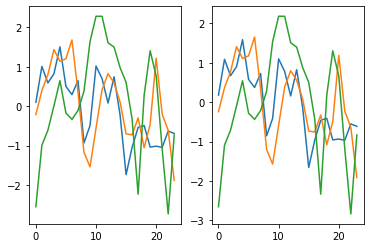

In [21]:
#窗前结果和Rect窗后结果
subject = 12
roi = 7

plt.subplot(1,2,1)
plt.plot(ts_n[subject,:24,4:7])

plt.subplot(1,2,2)
plt.plot(all_sl[subject,0,:,4:7])

In [14]:
ts_n.shape

(33, 320, 13)

In [15]:
all_sl.shape

(33, 296, 24, 13)

In [29]:
from nilearn.connectome import ConnectivityMeasure
estimator = ConnectivityMeasure(kind='correlation',vectorize=False,discard_diagonal=True)

all_FC_sl = []
for sl in all_sl:
    all_FC_sl.append(estimator.fit_transform(sl))
    
all_FC_sl = np.stack(all_FC_sl)
print(all_FC_sl.shape)

(33, 296, 13, 13)


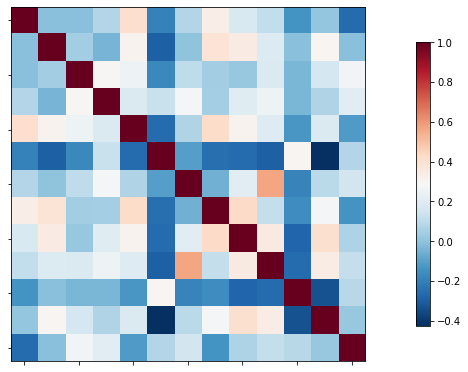

In [30]:
from nilearn.plotting import plot_matrix, plot_connectome

subject = 0
timewindow = 1

plot_matrix(all_FC_sl[0,1,:,:])

In [28]:
from nilearn.connectome import ConnectivityMeasure
estimator = ConnectivityMeasure(kind='covariance',vectorize=True,discard_diagonal=True)

all_FC_sl = []

for sl in all_sl:
    all_FC_sl.append(estimator.fit_transform(sl))
    
    
all_FC_sl = np.stack(all_FC_sl)
print(all_FC_sl.shape)

(33, 296, 78)


<font color=orange size=5 face="黑体"> Compute cosine similarity between dFC</font>